In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

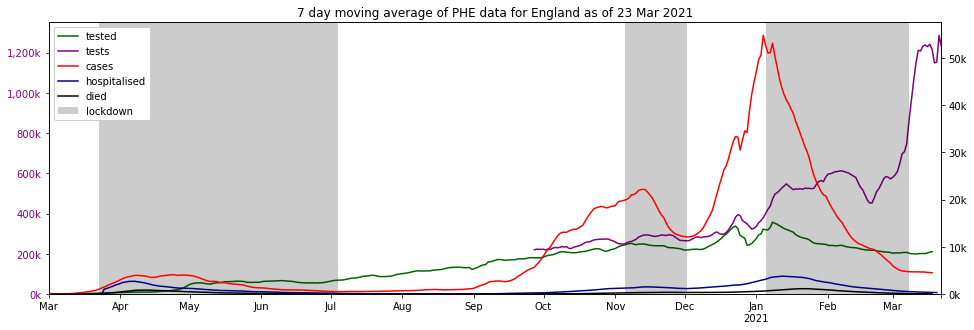

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

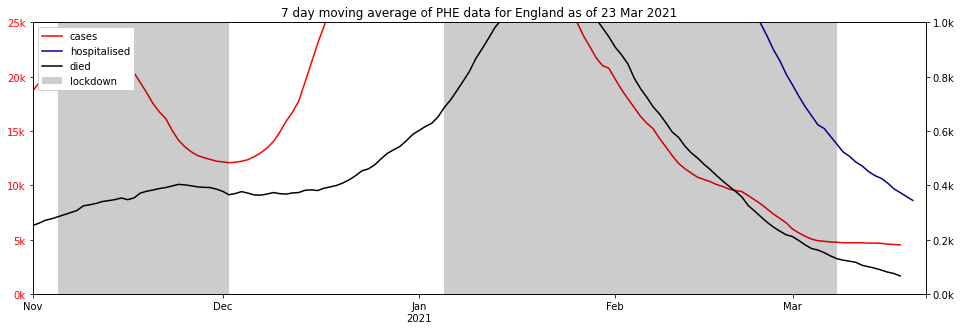

In [3]:
plot_summary(earliest_date='2020-11-01',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1685983.0,24137423.0,22451440.0,56286961,2.995335,39.887462,57.117203
1,Northern Ireland,N92000002,88683.0,687528.0,598845.0,1893667,4.683136,31.623564,63.693300
2,Scotland,S92000003,235671.0,2214672.0,1979001.0,5463300,4.313711,36.223546,59.462742
3,Wales,W92000004,353347.0,1288250.0,934903.0,3152879,11.207122,29.652359,59.140519


'partial: 28,327,873 (42.4%), full: 2,363,684'

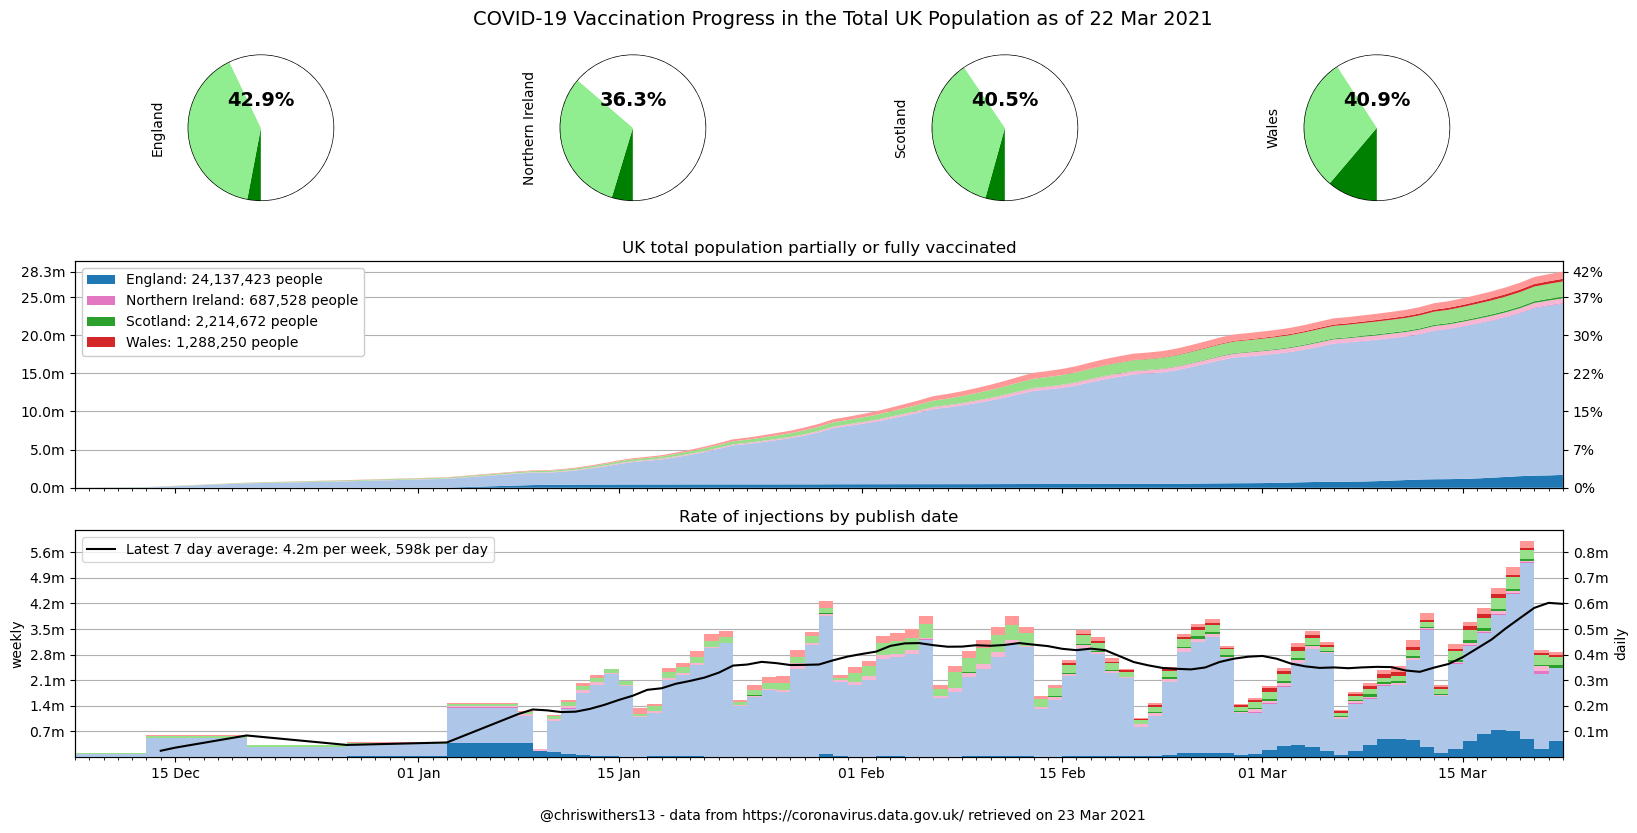

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,22 Mar 21,"+282,561","+64,436","+64,436","+24,137,423","+1,685,983","+1,685,983"
Northern Ireland,22 Mar 21,+0,+0,+0,"+687,528","+88,683","+88,683"
Scotland,22 Mar 21,"+32,272","+10,575","+10,575","+2,214,672","+235,671","+235,671"
Wales,22 Mar 21,"+15,064","+7,289","+7,289","+1,288,250","+353,347","+353,347"


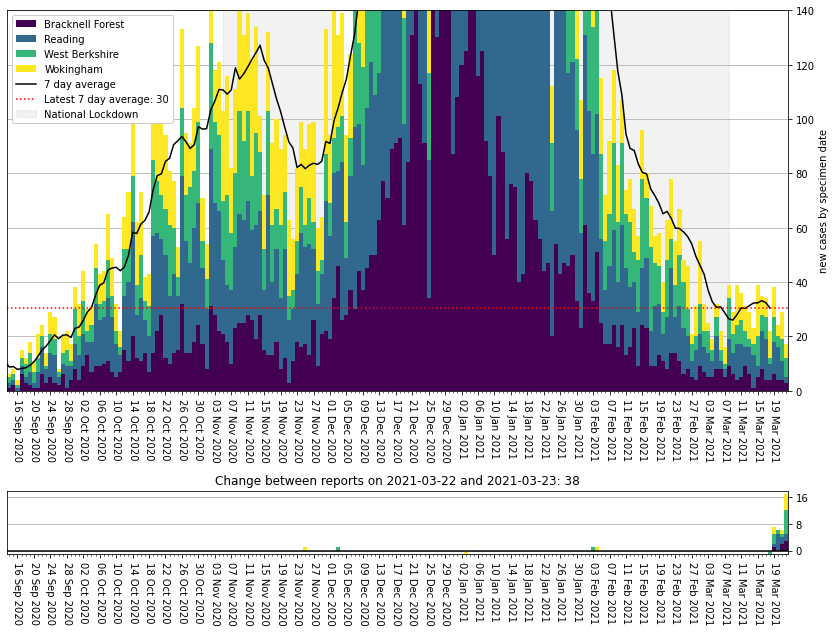

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

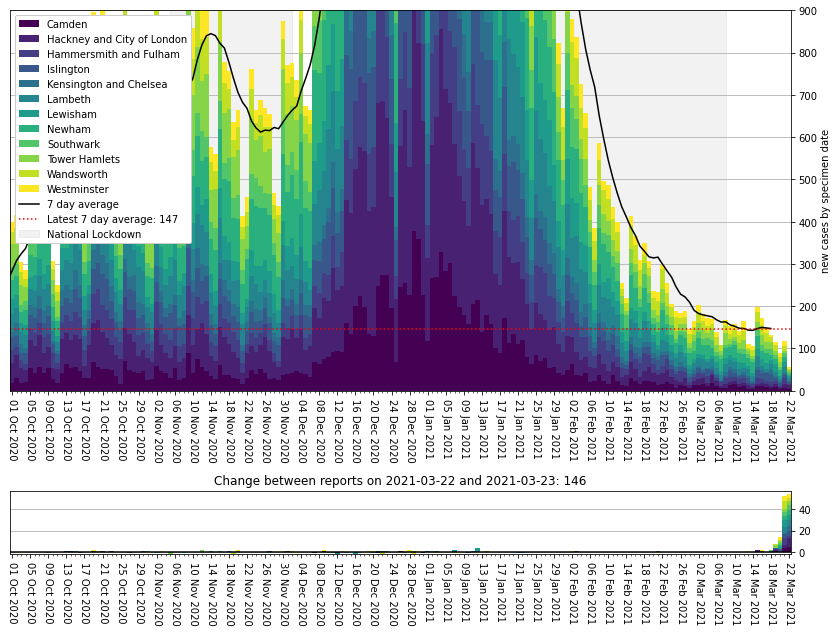

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,185.549309,134.0,2021-03-22
S12000040,West Lothian,181.867832,333.0,2021-03-22
E08000016,Barnsley,157.575365,389.0,2021-03-22
E06000013,North Lincolnshire,143.361270,247.0,2021-03-22
E06000010,"Kingston upon Hull, City of",132.420759,344.0,2021-03-22
E07000236,Redditch,130.188480,111.0,2021-03-22
E08000017,Doncaster,129.853474,405.0,2021-03-22
E08000018,Rotherham,127.726432,339.0,2021-03-22
E08000032,Bradford,124.496087,672.0,2021-03-22


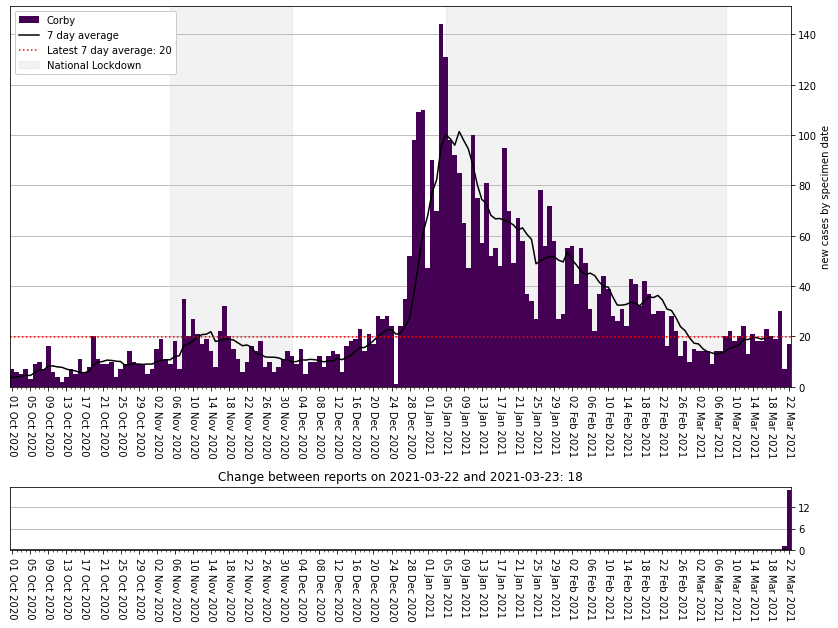

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,91.787190,728.0,2021-03-22
E08000025,Birmingham,62.269227,711.0,2021-03-22
E08000032,Bradford,124.496087,672.0,2021-03-22
E08000019,Sheffield,110.455106,646.0,2021-03-22
S12000049,Glasgow City,91.925701,582.0,2021-03-22
E08000036,Wakefield,121.729943,424.0,2021-03-22
E08000003,Manchester,74.521848,412.0,2021-03-22
E08000017,Doncaster,129.853474,405.0,2021-03-22
E08000016,Barnsley,157.575365,389.0,2021-03-22


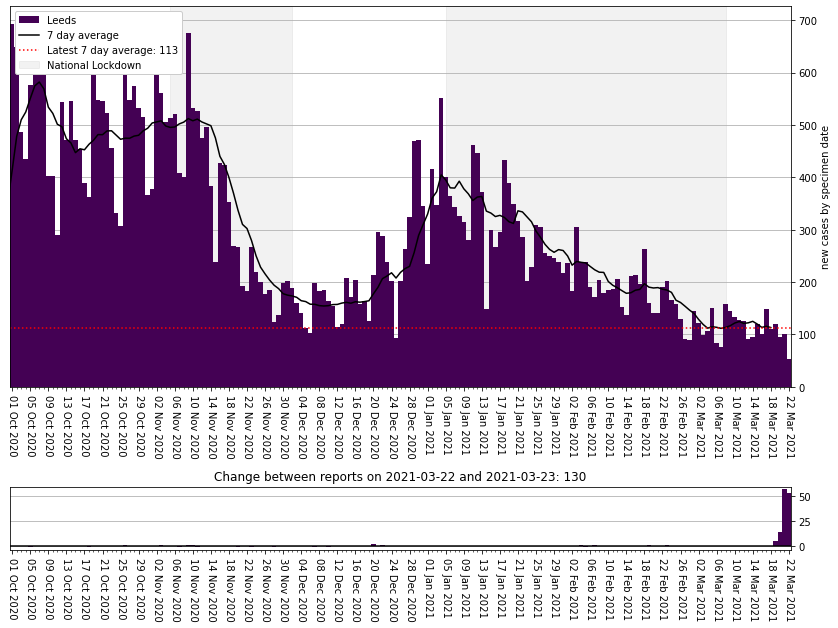

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

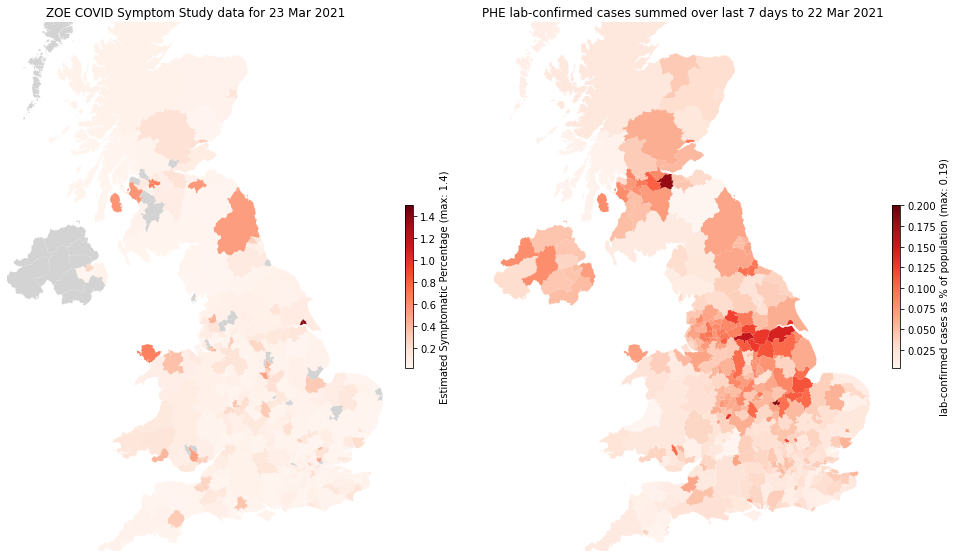

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

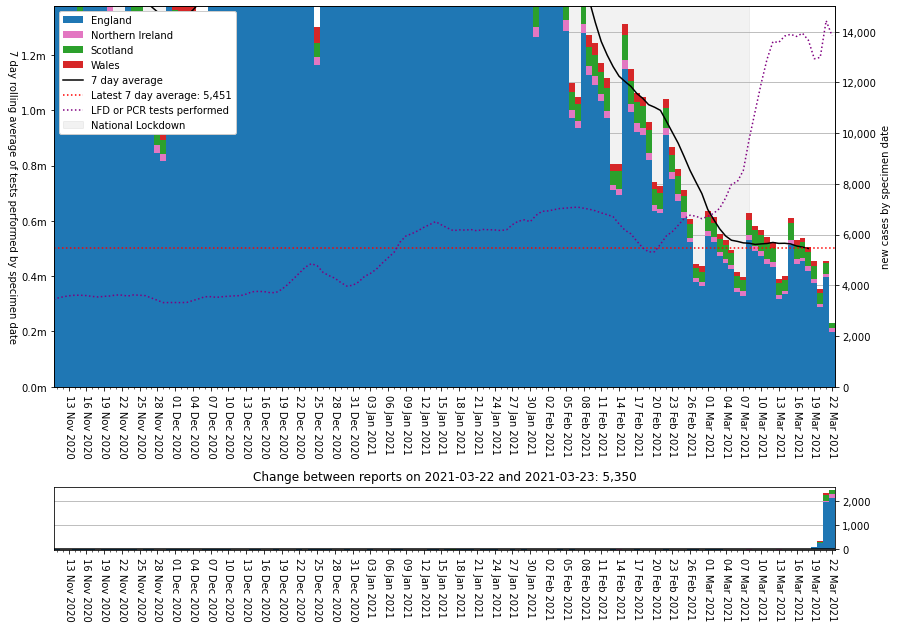

In [16]:
plot_areas(for_date, 'cases_nations', ylim=15_000, earliest='2020-11-11')